# **Waste Material Segregation for Improving Waste Management**

## **Objective**

The objective of this project is to implement an effective waste material segregation system using convolutional neural networks (CNNs) that categorises waste into distinct groups. This process enhances recycling efficiency, minimises environmental pollution, and promotes sustainable waste management practices.

The key goals are:

* Accurately classify waste materials into categories like cardboard, glass, paper, and plastic.
* Improve waste segregation efficiency to support recycling and reduce landfill waste.
* Understand the properties of different waste materials to optimise sorting methods for sustainability.

## **Data Understanding**

The Dataset consists of images of some common waste materials.

1. Food Waste
2. Metal
3. Paper
4. Plastic
5. Other
6. Cardboard
7. Glass


**Data Description**

* The dataset consists of multiple folders, each representing a specific class, such as `Cardboard`, `Food_Waste`, and `Metal`.
* Within each folder, there are images of objects that belong to that category.
* However, these items are not further subcategorised. <br> For instance, the `Food_Waste` folder may contain images of items like coffee grounds, teabags, and fruit peels, without explicitly stating that they are actually coffee grounds or teabags.

## **1. Load the data**

Load and unzip the dataset zip file.

**Import Necessary Libraries**

In [1]:
# Recommended versions:

# numpy version: 1.26.4
# pandas version: 2.2.2
# seaborn version: 0.13.2
# matplotlib version: 3.10.0
# PIL version: 11.1.0
# tensorflow version: 2.18.0
# keras version: 3.8.0
# sklearn version: 1.6.1

In [1]:
!pip install numpy==1.26.4 pandas==2.2.2 seaborn==0.13.2 matplotlib==3.10.0 pillow==11.1.0 tensorflow==2.18.0 keras==3.8.0 scikit-learn==1.6.1


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached tensorflow-2.18.0-cp311-cp311-win_amd64.whl.metadata (3.3 kB)
  Using cached keras-3.8.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached tensorflow_intel-2.18.0-cp311-cp311-win_amd64.whl.metadata (4.9 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached tensorflow-2.18.0-cp311-cp311-win_amd64.whl (7.5 kB)
Using cached keras-3.8.0-py3-none-any.whl (1.3 MB)
Using cached tensorflow_intel-2.18.0-cp311-cp311-win_amd64.whl (390.2 MB)
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2


In [2]:
# Import essential libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
from PIL import Image
import tensorflow as tf
import keras
import sklearn

print(f"numpy version: {np.__version__}")
print(f"pandas version: {pd.__version__}")
print(f"seaborn version: {sns.__version__}")
print(f"matplotlib version: {matplotlib.__version__}")
print(f"PIL (Pillow) version: {Image.__version__}")
print(f"tensorflow version: {tf.__version__}")
print(f"keras version: {keras.__version__}")
print(f"sklearn version: {sklearn.__version__}")

numpy version: 1.26.4
pandas version: 2.2.2
seaborn version: 0.13.2
matplotlib version: 3.10.0
PIL (Pillow) version: 11.1.0
tensorflow version: 2.18.0
keras version: 3.8.0
sklearn version: 1.6.1


Load the dataset.

In [5]:
# Load and unzip the dataset

import zipfile
import os

zip_file_path = 'data.zip'

try:
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall()
    print(f"Successfully extracted all files from {zip_file_path}")
except FileNotFoundError:
    print(f"Error: Zip file not found at {zip_file_path}")
except zipfile.BadZipFile:
    print(f"Error: {zip_file_path} is not a valid zip file.")

Successfully extracted all files from data.zip


## **2. Data Preparation** <font color=red> [25 marks] </font><br>


### **2.1 Load and Preprocess Images** <font color=red> [8 marks] </font><br>

Let us create a function to load the images first. We can then directly use this function while loading images of the different categories to load and crop them in a single step.

#### **2.1.1** <font color=red> [3 marks] </font><br>
Create a function to load the images.

In [7]:
# Create a function to load the raw images

def load_images(folder_path, img_size=(128, 128)):
    images = []
    labels = []
    classes = sorted(os.listdir(folder_path))
    for idx, cls in enumerate(classes):
        for file in os.listdir(os.path.join(folder_path, cls)):
            img = Image.open(os.path.join(folder_path, cls, file)).convert('RGB').resize(img_size)
            images.append(np.array(img))
            labels.append(idx)
    return np.array(images), np.array(labels), classes

if __name__ == '__main__':
    data_dir = 'data'
    X, y, class_names = load_images(data_dir)
    print("Images shape:", X.shape)
    print("Labels shape:", y.shape)
    print("Class names:", class_names)

Images shape: (7625, 128, 128, 3)
Labels shape: (7625,)
Class names: ['Cardboard', 'Food_Waste', 'Glass', 'Metal', 'Other', 'Paper', 'Plastic']


#### **2.1.2** <font color=red> [5 marks] </font><br>
Load images and labels.

Load the images from the dataset directory. Labels of images are present in the subdirectories.

Verify if the images and labels are loaded correctly.

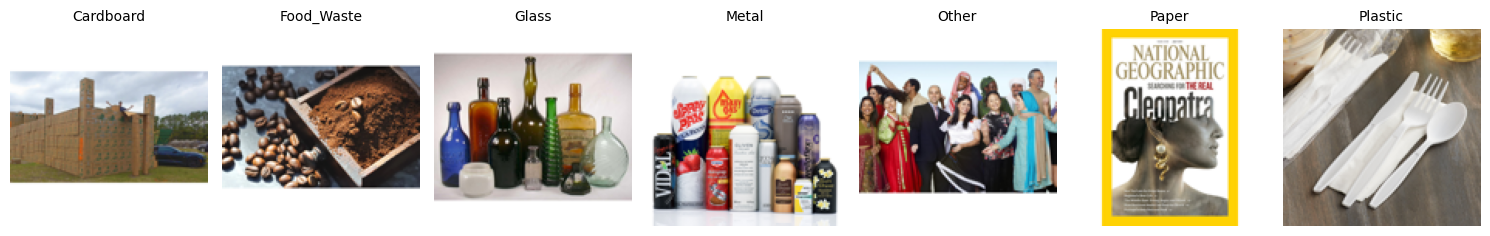

In [28]:
# Get the images and their labels
samples = {}
for img, label in zip(image_data, label_data):
    class_label = class_names_list[label]
    if class_label not in samples:
        samples[class_label] = img

if class_names_list:
    num_classes = len(class_names_list)
    fig, axes = plt.subplots(1, num_classes, figsize=(15, 5))
    if num_classes == 1:
        axes = [axes]

    for i, class_label in enumerate(class_names_list):
        if class_label in samples:
            axes[i].imshow(samples[class_label])
            axes[i].set_title(f"{class_label}", fontsize=10)
            axes[i].axis('off')
        else:
            axes[i].text(0.5, 0.5, f"No sample for\n{class_label}", ha='center', va='center')
            axes[i].axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("No class directories found in the specified data folder.")

Perform any operations, if needed, on the images and labels to get them into the desired format.

### **2.2 Data Visualisation** <font color=red> [9 marks] </font><br>

#### **2.2.1** <font color=red> [3 marks] </font><br>
Create a bar plot to display the class distribution

In [33]:
#from collections import Counter
#label_counts_raw = Counter(y)
#print("Raw Label Counts:", label_counts_raw)

#print("Class Labels:", class_label)

C:\Users\HP\AppData\Local\Temp\ipykernel_17196\3016311669.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_names_for_plot, y=counts_for_plot, palette="viridis")  # You can change 'viridis' to other seaborn palettes


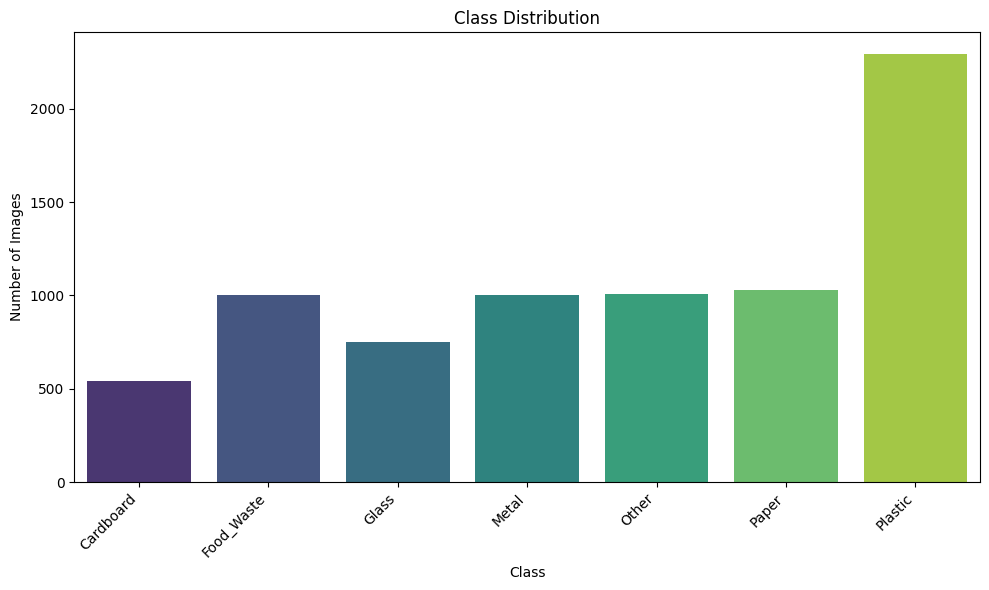

In [32]:
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

label_counts = Counter(label_data)

class_names_for_plot = [class_names_list[label] for label in label_counts.keys()]
counts_for_plot = list(label_counts.values())

# Create the bar plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=class_names_for_plot, y=counts_for_plot, palette="viridis") 
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Class Distribution')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### **2.2.2** <font color=red> [3 marks] </font><br>
Visualise some sample images

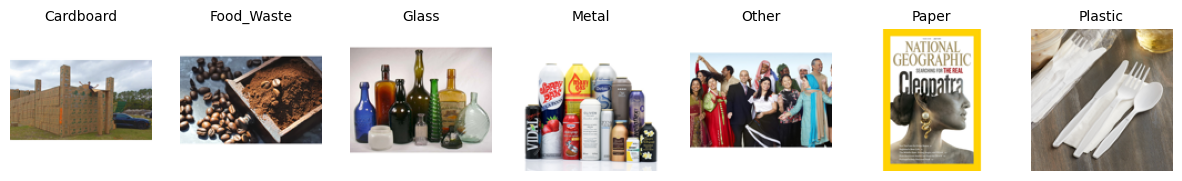

In [45]:
# Visualise Sample Images (across different labels)

if class_names_list:
    num_classes = len(class_names_list)
    fig, axes = plt.subplots(1, num_classes, figsize=(15, 5))
    if num_classes == 1:
        axes = [axes]

    for i, class_name in enumerate(class_names_list): 
        if class_name in samples:
            axes[i].imshow(samples[class_name])
            axes[i].set_title(f"{class_name}", fontsize=10)
            axes[i].axis('off')
        else:
            axes[i].text(0.5, 0.5, f"No sample for\n{class_name}", ha='center', va='center')
            axes[i].axis('off')

    plt.tight_layout

#### **2.2.3** <font color=red> [3 marks] </font><br>
Based on the smallest and largest image dimensions, resize the images.

In [46]:
# Find the smallest and largest image dimensions from the data set
heights = [img.shape[0] for img in X]
widths = [img.shape[1] for img in X]

min_height, max_height = min(heights), max(heights)
min_width, max_width = min(widths), max(widths)

print(f"Smallest image size: ({min_height}, {min_width})")
print(f"Largest image size: ({max_height}, {max_width})")


Smallest image size: (128, 128)
Largest image size: (128, 128)


In [ ]:
# Resize the image dimensions



### **2.3 Encoding the classes** <font color=red> [3 marks] </font><br>

There are seven classes present in the data.

We have extracted the images and their labels, and visualised their distribution. Now, we need to perform encoding on the labels. Encode the labels suitably.

####**2.3.1** <font color=red> [3 marks] </font><br>
Encode the target class labels.

In [49]:
# Encode the labels suitably

from sklearn.preprocessing import LabelEncoder
import numpy as np

label_encoder = LabelEncoder()

encoded_class_names = label_encoder.fit_transform(np.array(class_names_list))

# Print the mapping for clarity
label_mapping = {class_names_list[i]: encoded_class_names[i] for i in range(len(class_names_list))}
print("Label Mapping:")
for class_name, encoded_label in label_mapping.items():
    print(f"{class_name}: {encoded_label}")

Label Mapping:
Cardboard: 0
Food_Waste: 1
Glass: 2
Metal: 3
Other: 4
Paper: 5
Plastic: 6


### **2.4 Data Splitting** <font color=red> [5 marks] </font><br>

#### **2.4.1** <font color=red> [5 marks] </font><br>
Split the dataset into training and validation sets

In [50]:
# Assign specified parts of the dataset to train and validation sets

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, encoded_y, test_size=0.2, random_state=42, stratify=encoded_y)

print("Shape of X_train:", X_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_val:", y_val.shape)

Shape of X_train: (6100, 128, 128, 3)
Shape of X_val: (1525, 128, 128, 3)
Shape of y_train: (6100,)
Shape of y_val: (1525,)


## **3. Model Building and Evaluation** <font color=red> [20 marks] </font><br>

### **3.1 Model building and training** <font color=red> [15 marks] </font><br>

#### **3.1.1** <font color=red> [10 marks] </font><br>
Build and compile the model. Use 3 convolutional layers. Add suitable normalisation, dropout, and fully connected layers to the model.

Test out different configurations and report the results in conclusions.

In [51]:
# Build and compile the model

import tensorflow as tf
from tensorflow.keras import layers, models

input_shape = (128, 128, 3)  
num_classes = 7  

model = models.Sequential([
    # Convolutional Block 1
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    # Convolutional Block 2
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    # Convolutional Block 3
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    # Flatten the output
    layers.Flatten(),

    # Fully Connected Layers
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    # Output Layer
    layers.Dense(num_classes, activation='softmax')
])

learning_rate = 0.001
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,315,015 (12.65 MB)

 Trainable params: 3,314,183 (12.64 MB)

 Non-trainable params: 832 (3.25 KB)

#### **3.1.2** <font color=red> [5 marks] </font><br>
Train the model.

Use appropriate metrics and callbacks as needed.

In [52]:
# Training

import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True) 

checkpoint_filepath = 'best_model.h5'  
checkpoint = ModelCheckpoint(filepath=checkpoint_filepath, monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

reduce_lr = ReduceLROnPlateau(monitor='val_loss',factor=0.2, patience=5, min_lr=1e-6, verbose=1)


history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,             
    batch_size=32,         
    callbacks=[early_stop, checkpoint, reduce_lr],
    verbose=1             
)

Epoch 1/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 685ms/step - accuracy: 0.2114 - loss: 2.5819
Epoch 1: val_accuracy improved from -inf to 0.25639, saving model to best_model.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 142s 714ms/step - accuracy: 0.2116 - loss: 2.5806 - val_accuracy: 0.2564 - val_loss: 1.9739 - learning_rate: 0.0010
Epoch 2/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 659ms/step - accuracy: 0.3100 - loss: 1.9712
Epoch 2: val_accuracy improved from 0.25639 to 0.33443, saving model to best_model.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 131s 684ms/step - accuracy: 0.3101 - loss: 1.9708 - val_accuracy: 0.3344 - val_loss: 1.6861 - learning_rate: 0.0010
Epoch 3/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 722ms/step - accuracy: 0.3675 - loss: 1.7196
Epoch 3: val_accuracy improved from 0.33443 to 0.37049, saving model to best_model.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 144s 752ms/step - accuracy: 0.3676 - loss: 1.7194 - val_accuracy: 0.3705 - val_loss: 1.6881 - learning_rate: 0.0010
Epoch 4/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 682ms/step - accuracy: 0.3867 - loss: 1.6142
Epoch 4: val_accuracy improved from 0.37049 to 0.43541, saving model to best_model.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 135s 707ms/step - accuracy: 0.3868 - loss: 1.6141 - val_accuracy: 0.4354 - val_loss: 1.5262 - learning_rate: 0.0010
Epoch 5/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 672ms/step - accuracy: 0.4441 - loss: 1.5027
Epoch 5: val_accuracy improved from 0.43541 to 0.45574, saving model to best_model.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 133s 697ms/step - accuracy: 0.4441 - loss: 1.5026 - val_accuracy: 0.4557 - val_loss: 1.4554 - learning_rate: 0.0010
Epoch 6/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 651ms/step - accuracy: 0.4525 - loss: 1.4424
Epoch 6: val_accuracy did not improve from 0.45574
191/191 ━━━━━━━━━━━━━━━━━━━━ 130s 678ms/step - accuracy: 0.4526 - loss: 1.4424 - val_accuracy: 0.2938 - val_loss: 1.9143 - learning_rate: 0.0010
Epoch 7/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 674ms/step - accuracy: 0.4830 - loss: 1.4142
Epoch 7: val_accuracy did not improve from 0.45574
191/191 ━━━━━━━━━━━━━━━━━━━━ 133s 698ms/step - accuracy: 0.4829 - loss: 1.4143 - val_accuracy: 0.4393 - val_loss: 1.4879 - learning_rate: 0.0010
Epoch 8/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 648ms/step - accuracy: 0.5022 - loss: 1.3597
Epoch 8: val_accuracy did not improve from 0.45574
191/191 ━━━━━━━━━━━━━━━━━━━━ 129s 673ms/step - accuracy: 0.5022 - loss: 1.3596 - val_accuracy: 0.4033 - val_loss: 1.7025 - learning_rate: 0.0010
Epo

191/191 ━━━━━━━━━━━━━━━━━━━━ 134s 700ms/step - accuracy: 0.5071 - loss: 1.3674 - val_accuracy: 0.5036 - val_loss: 1.3306 - learning_rate: 0.0010
Epoch 10/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 680ms/step - accuracy: 0.5524 - loss: 1.2388
Epoch 10: val_accuracy improved from 0.50361 to 0.51279, saving model to best_model.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 135s 705ms/step - accuracy: 0.5524 - loss: 1.2388 - val_accuracy: 0.5128 - val_loss: 1.3602 - learning_rate: 0.0010
Epoch 11/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 674ms/step - accuracy: 0.5627 - loss: 1.2099
Epoch 11: val_accuracy improved from 0.51279 to 0.53115, saving model to best_model.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 135s 707ms/step - accuracy: 0.5628 - loss: 1.2098 - val_accuracy: 0.5311 - val_loss: 1.2968 - learning_rate: 0.0010
Epoch 12/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 797ms/step - accuracy: 0.6082 - loss: 1.0924
Epoch 12: val_accuracy improved from 0.53115 to 0.53377, saving model to best_model.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 159s 832ms/step - accuracy: 0.6082 - loss: 1.0925 - val_accuracy: 0.5338 - val_loss: 1.3498 - learning_rate: 0.0010
Epoch 13/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 806ms/step - accuracy: 0.6301 - loss: 1.0375
Epoch 13: val_accuracy improved from 0.53377 to 0.54492, saving model to best_model.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 160s 837ms/step - accuracy: 0.6301 - loss: 1.0375 - val_accuracy: 0.5449 - val_loss: 1.2792 - learning_rate: 0.0010
Epoch 14/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 805ms/step - accuracy: 0.6547 - loss: 0.9869
Epoch 14: val_accuracy did not improve from 0.54492
191/191 ━━━━━━━━━━━━━━━━━━━━ 159s 835ms/step - accuracy: 0.6545 - loss: 0.9872 - val_accuracy: 0.4970 - val_loss: 1.4231 - learning_rate: 0.0010
Epoch 15/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 811ms/step - accuracy: 0.6672 - loss: 0.9509
Epoch 15: val_accuracy improved from 0.54492 to 0.56787, saving model to best_model.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 161s 843ms/step - accuracy: 0.6672 - loss: 0.9509 - val_accuracy: 0.5679 - val_loss: 1.2399 - learning_rate: 0.0010
Epoch 16/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 810ms/step - accuracy: 0.6979 - loss: 0.8486
Epoch 16: val_accuracy did not improve from 0.56787
191/191 ━━━━━━━━━━━━━━━━━━━━ 160s 840ms/step - accuracy: 0.6978 - loss: 0.8487 - val_accuracy: 0.4852 - val_loss: 1.8249 - learning_rate: 0.0010
Epoch 17/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 790ms/step - accuracy: 0.7368 - loss: 0.7708
Epoch 17: val_accuracy did not improve from 0.56787
191/191 ━━━━━━━━━━━━━━━━━━━━ 157s 819ms/step - accuracy: 0.7368 - loss: 0.7709 - val_accuracy: 0.5587 - val_loss: 1.2431 - learning_rate: 0.0010
Epoch 18/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 759ms/step - accuracy: 0.7679 - loss: 0.6819
Epoch 18: val_accuracy improved from 0.56787 to 0.62033, saving model to best_model.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 151s 790ms/step - accuracy: 0.7679 - loss: 0.6820 - val_accuracy: 0.6203 - val_loss: 1.1000 - learning_rate: 0.0010
Epoch 19/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 761ms/step - accuracy: 0.7795 - loss: 0.6466
Epoch 19: val_accuracy did not improve from 0.62033
191/191 ━━━━━━━━━━━━━━━━━━━━ 151s 790ms/step - accuracy: 0.7794 - loss: 0.6467 - val_accuracy: 0.5908 - val_loss: 1.2416 - learning_rate: 0.0010
Epoch 20/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.7819 - loss: 0.6166
Epoch 20: val_accuracy did not improve from 0.62033
191/191 ━━━━━━━━━━━━━━━━━━━━ 999s 5s/step - accuracy: 0.7819 - loss: 0.6167 - val_accuracy: 0.5875 - val_loss: 1.2758 - learning_rate: 0.0010


### **3.2 Model Testing and Evaluation** <font color=red> [5 marks] </font><br>

#### **3.2.1** <font color=red> [5 marks] </font><br>
Evaluate the model on test dataset. Derive appropriate metrics.

In [54]:
# Evaluate on the test set; display suitable metrics

loss, accuracy = model.evaluate(X_val, y_val, verbose=0)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")

Validation Loss: 1.1000
Validation Accuracy: 0.6203


48/48 ━━━━━━━━━━━━━━━━━━━━ 6s 119ms/step
classification Report

              precision    recall  f1-score   support

   Cardboard       0.64      0.81      0.72       108
  Food_Waste       0.71      0.69      0.70       200
       Glass       0.53      0.52      0.53       150
       Metal       0.75      0.57      0.65       200
       Other       0.44      0.42      0.43       202
       Paper       0.57      0.53      0.55       206
     Plastic       0.66      0.72      0.69       459

    accuracy                           0.62      1525
   macro avg       0.61      0.61      0.61      1525
weighted avg       0.62      0.62      0.62      1525



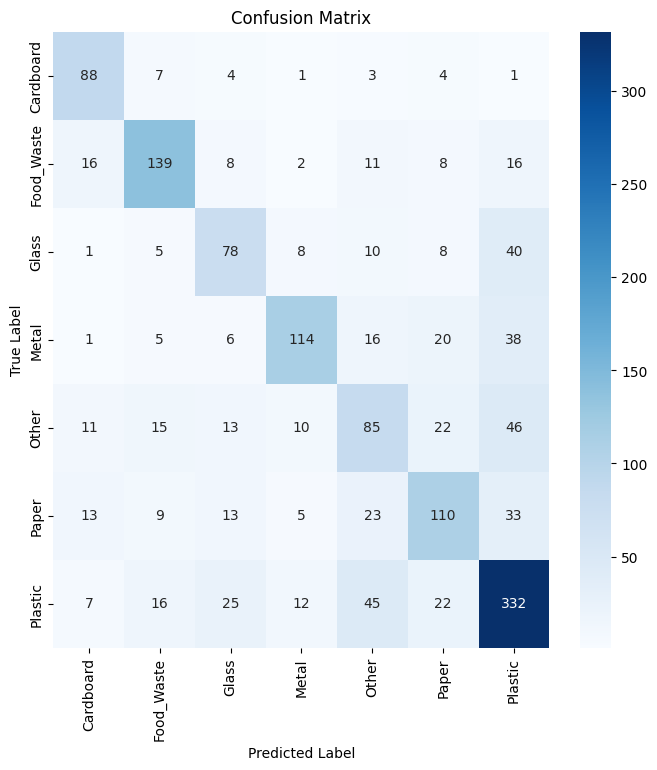

In [56]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred_probs = model.predict(X_val)
y_pred = np.argmax(y_pred_probs, axis=1)

report = classification_report(y_val, y_pred, target_names=class_names_list)

print("classification Report\n")
print(report)

cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names_list, yticklabels=class_names_list)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## **4. Data Augmentation** <font color=red> [optional] </font><br>

#### **4.1 Create a Data Augmentation Pipeline**

##### **4.1.1**
Define augmentation steps for the datasets.

In [ ]:
# Define augmentation steps to augment images



Augment and resample the images.
In case of class imbalance, you can also perform adequate undersampling on the majority class and augment those images to ensure consistency in the input datasets for both classes.

Augment the images.

In [ ]:
# Create a function to augment the images




In [ ]:
# Create the augmented training dataset



##### **4.1.2**

Train the model on the new augmented dataset.

In [ ]:
# Train the model using augmented images



## **5. Conclusions** <font color = red> [5 marks]</font>

#### **5.1 Conclude with outcomes and insights gained** <font color =red> [5 marks] </font>

* Report your findings about the data
* Report model training results

**Findings about the Data:**

1. Seven waste classes with uneven distribution (more "Plastic").
2. Visual differences exist but some classes ("Other", "Glass") appear challenging to distinguish.


**Model Training Results:**

1. Validation accuracy: ~62%.
2. Validation loss: ~1.10.
3. Performance varied significantly per class ("Plastic", "Cardboard", "Food_Waste" better; "Other", "Glass", "Paper" worse).
4. Callbacks likely aided in training stability and preventing overfitting.